## Running pyscf to populate the MolecularData class

The module run_pyscf.py provides a user-friendly way of running psi4 calculations in FermiLib. The basic idea is that once one generates a MolecularData instance, one can then call pyscf with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in FermiLib would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. 
Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated psi4 input files or not. To use this plugin, you will need to personally download pyscf.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. See the pyscf documentation for more information or consult and electronic structure theory expert.

Warn: Ipython shell catchs sys.args



At bond length of 0.2 Bohr, molecular hydrogen has:
Hartree-Fock energy of 0.164175012062 Hartree.
MP2 energy of 0.159042666999 Hartree.
FCI energy of 0.157482134798 Hartree.
Nuclear repulsion energy between protons is 2.6458860546 Hartree.
Spatial orbital 0 has energy of -0.858824527772 Hartree.
Spatial orbital 1 has energy of 1.57236203198 Hartree.

At bond length of 0.4 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.904361394164 Hartree.
MP2 energy of -0.911436819061 Hartree.
FCI energy of -0.914149704627 Hartree.
Nuclear repulsion energy between protons is 1.3229430273 Hartree.
Spatial orbital 0 has energy of -0.745212534285 Hartree.
Spatial orbital 1 has energy of 1.16741639842 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 0.6 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.10112824227 Hartree.
MP2 energy of -1.1113321393 Hartree.
FCI energy of -1.11628600687 Hartree.
Nuclear repulsion energy between protons is 0.8819620182 Hartree.
Spatial orbital 0 has energy of -0.640876265659 Hartree.
Spatial orbital 1 has energy of 0.83808498176 Hartree.

At bond length of 0.8 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.11085039748 Hartree.
MP2 energy of -1.12545353399 Hartree.
FCI energy of -1.13414766668 Hartree.
Nuclear repulsion energy between protons is 0.66147151365 Hartree.
Spatial orbital 0 has energy of -0.554495881131 Hartree.
Spatial orbital 1 has energy of 0.612618086735 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.0 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.06610864932 Hartree.
MP2 energy of -1.08666536468 Hartree.
FCI energy of -1.10115033023 Hartree.
Nuclear repulsion energy between protons is 0.52917721092 Hartree.
Spatial orbital 0 has energy of -0.484441680354 Hartree.
Spatial orbital 1 has energy of 0.457501939048 Hartree.

At bond length of 1.2 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.00510670657 Hartree.
MP2 energy of -1.03366287978 Hartree.
FCI energy of -1.05674074631 Hartree.
Nuclear repulsion energy between protons is 0.4409810091 Hartree.
Spatial orbital 0 has energy of -0.426502642128 Hartree.
Spatial orbital 1 has energy of 0.344126881369 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.4 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.941480654708 Hartree.
MP2 energy of -0.980569709566 Hartree.
FCI energy of -1.01546824929 Hartree.
Nuclear repulsion energy between protons is 0.377983722086 Hartree.
Spatial orbital 0 has energy of -0.377322825369 Hartree.
Spatial orbital 1 has energy of 0.258901974587 Hartree.

At bond length of 1.6 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.881732449946 Hartree.
MP2 energy of -0.934242370768 Hartree.
FCI energy of -0.983472729033 Hartree.
Nuclear repulsion energy between protons is 0.330735756825 Hartree.
Spatial orbital 0 has energy of -0.335296351955 Hartree.
Spatial orbital 1 has energy of 0.194597957362 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.8 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.828848147927 Hartree.
MP2 energy of -0.897882021918 Hartree.
FCI energy of -0.961816952793 Hartree.
Nuclear repulsion energy between protons is 0.2939873394 Hartree.
Spatial orbital 0 has energy of -0.299563221524 Hartree.
Spatial orbital 1 has energy of 0.145960298298 Hartree.

At bond length of 2.0 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.783792654277 Hartree.
MP2 energy of -0.872511876467 Hartree.
FCI energy of -0.948641112176 Hartree.
Nuclear repulsion energy between protons is 0.26458860546 Hartree.
Spatial orbital 0 has energy of -0.269459223656 Hartree.
Spatial orbital 1 has energy of 0.108997369549 Hartree.


Warn: Ipython shell catchs sys.args


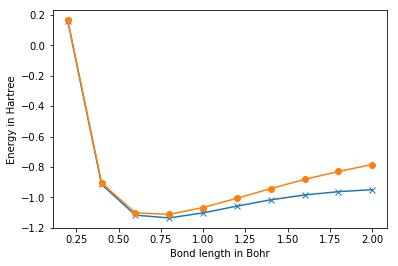

In [1]:
from fermilib.utils import MolecularData
from fermilibpluginpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.2
n_points = 10

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4.
    molecule = run_pyscf(molecule,
                         run_scf=run_scf,
                         run_mp2=run_mp2,
                         run_cisd=run_cisd,
                         run_ccsd=run_ccsd,
                         run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} Bohr, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in Bohr')
plt.show()